<a href="https://colab.research.google.com/github/Garima27dec/Emotion-Detection-with-Multiple-Data-Streams/blob/main/NLP_Text_Sentiment_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Emotion_Recognition/Text_ER/tweet_emotions.csv")
df.head(5)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [5]:
df['sentiment'] = df['sentiment'].replace(["worry","happiness","sadness","love","surprise","fun","relief","hate","empty","enthusiasm", "boredom", "anger"], ["negative","positive","negative","positive","positive","positive","neutral","negative","neutral","positive","negative","negative"])

In [7]:
df['sentiment'].value_counts()

negative    15236
positive    13773
neutral     10991
Name: sentiment, dtype: int64

In [9]:
df['label_num'] = df['sentiment'].map({
    'negative': 0,
    'neutral' : 1,
    'positive': 2
})

df.head(5)

,tweet_id,sentiment,content,label_num
0,1956967341,neutral,@tiffanylue i know i was listenin to bad habi...,1
1,1956967666,negative,Layin n bed with a headache ughhhh...waitin o...,0
2,1956967696,negative,Funeral ceremony...gloomy friday...,0
3,1956967789,positive,wants to hang out with friends SOON!,2
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,1


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.content,df.label_num,test_size=0.2)

In [11]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (32000,)
Shape of X_test:  (8000,)


In [12]:
y_train.value_counts()

0    12216
2    10968
1     8816
Name: label_num, dtype: int64

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.03      0.05      3020
           1       0.27      0.96      0.42      2175
           2       0.76      0.06      0.11      2805

    accuracy                           0.29      8000
   macro avg       0.54      0.35      0.19      8000
weighted avg       0.56      0.29      0.17      8000



In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64      3020
           1       0.48      0.33      0.39      2175
           2       0.62      0.54      0.58      2805

    accuracy                           0.56      8000
   macro avg       0.55      0.54      0.54      8000
weighted avg       0.56      0.56      0.55      8000



In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2259,  350,  411],
       [ 934,  714,  527],
       [ 849,  429, 1527]])

Text(95.72222222222221, 0.5, 'Truth')

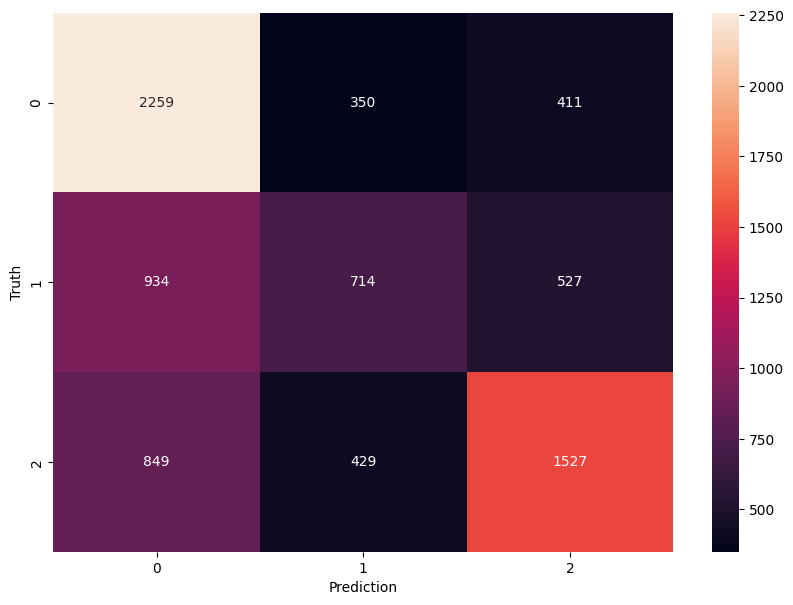

In [16]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [17]:
import spacy

In [18]:
nlp = spacy.load("en_core_web_sm")

In [19]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [20]:
df['processed_text'] = df["content"].apply(preprocess)

In [21]:
df.head()

,tweet_id,sentiment,content,label_num,processed_text
0,1956967341,neutral,@tiffanylue i know i was listenin to bad habi...,1,@tiffanylue know listenin bad habit early st...
1,1956967666,negative,Layin n bed with a headache ughhhh...waitin o...,0,Layin n bed headache ughhhh waitin
2,1956967696,negative,Funeral ceremony...gloomy friday...,0,funeral ceremony gloomy friday
3,1956967789,positive,wants to hang out with friends SOON!,2,want hang friend soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,1,@dannycastillo want trade Houston ticket


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    df.processed_text,
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62      3047
           1       0.46      0.40      0.43      2198
           2       0.60      0.59      0.59      2755

    accuracy                           0.56      8000
   macro avg       0.55      0.55      0.55      8000
weighted avg       0.56      0.56      0.56      8000



In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1976,  528,  543],
       [ 752,  882,  564],
       [ 604,  523, 1628]])

Text(95.72222222222221, 0.5, 'Truth')

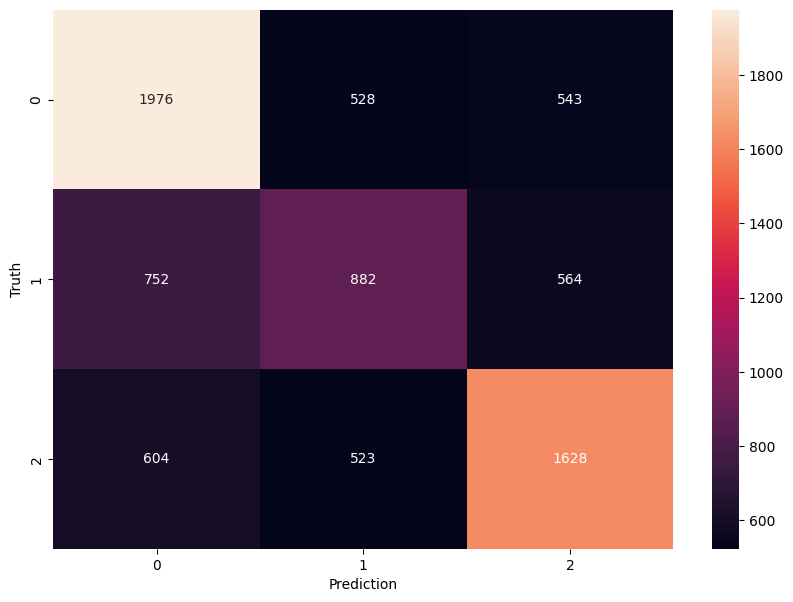

In [25]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')